### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Friday, Mar 5th at 11.59pm CST
---

In [14]:
#CLD Imports for this hw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.stats import norm
from scipy.stats import uniform

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [19]:
#CLD reading in the data
placeholder = np.load('../../../coursework/homeworks/hw_data/hw4_data_1.npy')
data = placeholder[:,0]
uncert = placeholder[:,1]

In [20]:
#CLD calcing the sample mean and the standard error on the sample mean using the same method from hw3
#CLD from lecture 5 using the sample mean equation for heterodescadstic gaussian
sample_mean = np.sum(data / (uncert**2)) / np.sum(1/(uncert**2))

#CLD from same lecutre using the formula for std on sample mean
std_sample_mean = 1 / np.sqrt(np.sum(1/(uncert**2)))

print('This samples mean: '+str(sample_mean))
print('The standard error on this sample mean: '+str(std_sample_mean))
print("")

This samples mean: 4.942118214425304
The standard error on this sample mean: 0.43024334605205083



In [21]:
#CLD otimizing the log likelihood to fit. Again method taken from hw3
#CLD using the same technique as was established in lecture 6 but instead finding the best fit sample mean from the 
#CLD log likelihood function
#CLD establishing the log likelihood function
def lnL_hetero(mean_guess, y, sig):
    return np.sum((y-mean_guess)**2/(sig**2), -1)

#CLD creating a second function that runs it changing mu?
f_lnL_hetero = lambda mu: lnL_hetero(mu, 
                                      y=data, sig=uncert)
#CLD optimizing it to find the best sample mean
mu = 4
mu_squared = scipy.optimize.fmin(f_lnL_hetero, mu)

print('The fitted mu: '+str(mu_squared[0]))
print("")

Optimization terminated successfully.
         Current function value: 5.614502
         Iterations: 15
         Function evaluations: 30
The fitted mu: 4.9420898437500025



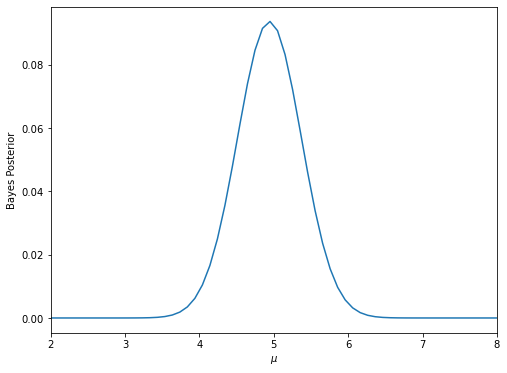

In [120]:
#CLD the likelihood is the sum of the pdf at mu_guessed
#CLD the prior is uniform dist centered at 3 with scale 4=(7-3)

mu_grid = np.linspace(0,10,100)
bayes_prob = []
for mu in mu_grid:
    L = np.prod(norm.pdf(data, mu, uncert)) * uniform.pdf(mu,3,4)
    bayes_prob.append(L)
    
bayes_prob = np.array(bayes_prob)

#CLD to normalize divide my the area under the graph, or the sum of bayes_prob
bayes_prob_norm = bayes_prob / np.sum(bayes_prob)

#CLD plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mu_grid, bayes_prob_norm)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('Bayes Posterior')
ax.set_xlim(2,8)
plt.show(fig);

In [117]:
#CLD the MAP values is the easiest to find so will be doing that first
#CLD the MAP should just be mu at which the maximum posterior value occurs

max_ind = np.argmax(bayes_prob_norm)
MAP = mu_grid[max_ind]

#CLD to use the pdf to make a cdf iteratiely sum over x+dx of the normalized posterior function
#CLD this works as the cdf is defined as the integral of the pdf and this is a way to approx the integral
cdf = []
for i in range(len(bayes_prob_norm)):
    x = np.sum(bayes_prob_norm[:i])
    cdf.append(x)

cdf = np.array(cdf)

#CLD the 68.3% credible region of equal tails will be repersented by the boundaries found at 16% and 84%
#CLD there most likely will not be values exactly equal to the above in the cdf so will be using them as a lower 
#CLD boundary to mask to and then taking the first values in mask
lower_mask = np.where(cdf > 0.16)
upper_mask = np.where(cdf > 0.84)

upper_mu = mu_grid[upper_mask]
lower_mu = mu_grid[lower_mask]

print('The MAP of this distribution is: '+str(MAP))
print('The upper bound mu is: '+str(upper_mu[0]))
print('The lower bound mu is: '+str(lower_mu[0]))
print('\nAlthough not exact, this agrees relatively well with the bounds set by the fitted mu and the found sample mean errors.')


The MAP of this distribution is: 4.94949494949495
The upper bound mu is: 5.454545454545454
The lower bound mu is: 4.646464646464646

Although not exact, this agrees relatively well with the bounds set by the fitted mu and the found sample mean errors.


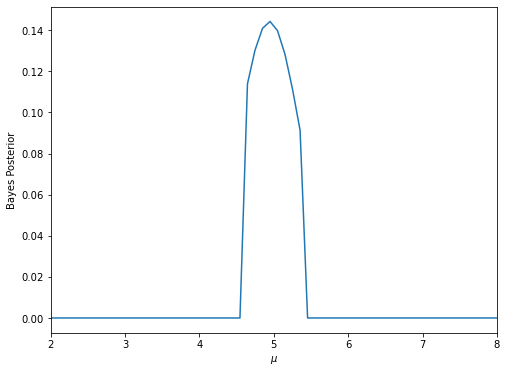

In [119]:
#CLD redoing (3) but with a uniform prior in range of 4.6 o 5.4

#CLD the likelihood is the sum of the pdf at mu_guessed
#CLD the prior is uniform dist centered at 3 with scale 4=(7-3)

mu_grid = np.linspace(0,10,100)
bayes_prob2 = []
for mu in mu_grid:
    L = np.prod(norm.pdf(data, mu, uncert)) * uniform.pdf(mu,4.6,(5.4-4.6))
    bayes_prob2.append(L)
    
bayes_prob2 = np.array(bayes_prob2)

#CLD to normalize divide my the area under the graph, or the sum of bayes_prob
bayes_prob_norm2 = bayes_prob2 / np.sum(bayes_prob2)

#CLD plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mu_grid, bayes_prob_norm2)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('Bayes Posterior')
ax.set_xlim(2,8)
plt.show(fig);

In [36]:
#CLD redoing (4) with this new bayes posterior pdf
#CLD the MAP values is the easiest to find so will be doing that first
#CLD the MAP should just be mu at which the maximum posterior value occurs

max_ind = np.argmax(bayes_prob_norm2)
MAP2 = mu_grid[max_ind]

#CLD to use the pdf to make a cdf iteratiely sum over x+dx of the normalized posterior function
#CLD this works as the cdf is defined as the integral of the pdf and this is a way to approx the integral
cdf2 = []
for i in range(len(bayes_prob_norm2)):
    x = np.sum(bayes_prob_norm2[:i])
    cdf2.append(x)

cdf2 = np.array(cdf2)

#CLD the 68.3% credible region of equal tails will be repersented by the boundaries found at 16% and 84%
#CLD there most likely will not be values exactly equal to the above in the cdf so will be using them as a lower 
#CLD boundary to mask to and then taking the first values in mask
lower_mask = np.where(cdf2 > 0.16)
upper_mask = np.where(cdf2 > 0.84)

upper_mu2 = mu_grid[upper_mask]
lower_mu2 = mu_grid[lower_mask]

print('The MAP of this distribution is: '+str(MAP2))
print('The upper bound mu is: '+str(upper_mu2[0]))
print('The lower bound mu is: '+str(lower_mu2[0]))

The MAP of this distribution is: 4.94949494949495
The upper bound mu is: 5.353535353535354
The lower bound mu is: 4.848484848484849


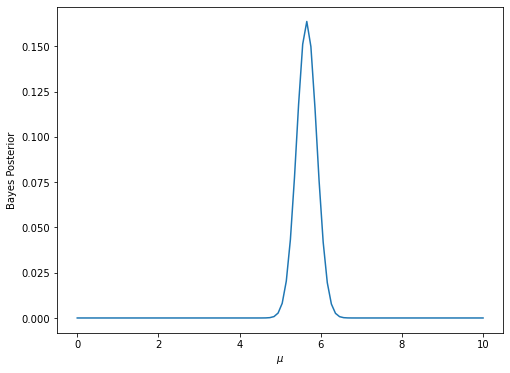

In [118]:
#CLD repeating (3) again with new prior
#CLD the guassian prior should be essentially the same but using the norm.pdf function
#CLD all else will be directly transfered from (3)

#CLD the likelihood is the sum of the pdf at mu_guessed
#CLD the prior is uniform dist centered at 3 with scale 4=(7-3)

mu_grid = np.linspace(0,10,100)
bayes_prob3 = []
for mu in mu_grid:
    L = np.prod(norm.pdf(data, mu, uncert)) * norm.pdf(mu,6,0.3)
    bayes_prob3.append(L)
    
bayes_prob3 = np.array(bayes_prob3)

#CLD to normalize divide my the area under the graph, or the sum of bayes_prob
bayes_prob_norm3 = bayes_prob3 / np.sum(bayes_prob3)

#CLD plotting
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mu_grid, bayes_prob_norm3)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('Bayes Posterior')
plt.show(fig);

In [43]:
#CLD again the same procedure as (4) and (6) but with new posterior distribution

#CLD the MAP values is the easiest to find so will be doing that first
#CLD the MAP should just be mu at which the maximum posterior value occurs

max_ind = np.argmax(bayes_prob_norm3)
MAP3 = mu_grid[max_ind]

#CLD to use the pdf to make a cdf iteratiely sum over x+dx of the normalized posterior function
#CLD this works as the cdf is defined as the integral of the pdf and this is a way to approx the integral
cdf3 = []
for i in range(len(bayes_prob_norm3)):
    x = np.sum(bayes_prob_norm3[:i])
    cdf3.append(x)

cdf3 = np.array(cdf3)

#CLD the 68.3% credible region of equal tails will be repersented by the boundaries found at 16% and 84%
#CLD there most likely will not be values exactly equal to the above in the cdf so will be using them as a lower 
#CLD boundary to mask to and then taking the first values in mask
lower_mask = np.where(cdf3 > 0.16)
upper_mask = np.where(cdf3 > 0.84)

upper_mu3 = mu_grid[upper_mask]
lower_mu3 = mu_grid[lower_mask]

print('The MAP of this distribution is: '+str(MAP3))
print('The upper bound mu is: '+str(upper_mu3[0]))
print('The lower bound mu is: '+str(lower_mu3[0]))


The MAP of this distribution is: 5.656565656565657
The upper bound mu is: 5.959595959595959
The lower bound mu is: 5.555555555555555


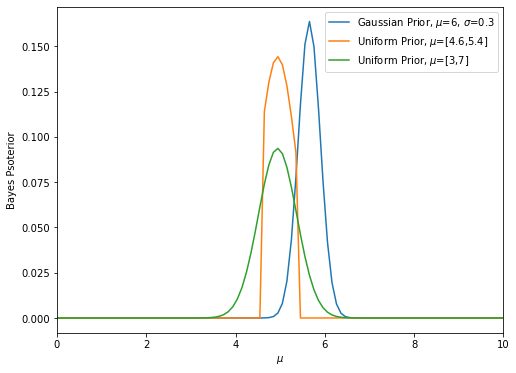

In [45]:
#CLD plotting all of the normalized posterior pdfs together
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mu_grid, bayes_prob_norm3, label=r'Gaussian Prior, $\mu$=6, $\sigma$=0.3')
ax.plot(mu_grid, bayes_prob_norm2, label=r'Uniform Prior, $\mu$=[4.6,5.4]')
ax.plot(mu_grid, bayes_prob_norm, label=r'Uniform Prior, $\mu$=[3,7]')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('Bayes Psoterior')
ax.set_xlim(0,10)
ax.legend()
plt.show(fig);

In [121]:
#CLD first storing the bayesian evidence for the unknown, wide range mean
bayes_evid_wide = np.sum(bayes_prob)

#CLD a delta prior means it is only one at that exact value and zero else where
#CLD meaning if we find the likelihood at the sample mean (where the delta=1)
#CLD thenn we have the evidence for this model as all other values would be 0 and have no effect on the sum
bayes_evid_known = np.prod(norm.pdf(data, sample_mean, uncert))

#CLD the Bayes factor is simply the ratio between the two
bayes_factor = bayes_evid_wide / bayes_evid_known

print('The Bayesian evidence for the wide prior: '+str(bayes_evid_wide))
print('The Bayesian evidence for the narrow prior: '+str(bayes_evid_known))
print('The Bayes factor between these two models (unknown/known): '+str(bayes_factor))
print('\nThere is not much of an Occam penatlty for the wide prior model. If anything, the Bayes factor favors it over the known mean model.')


The Bayesian evidence for the wide prior: 2.862955514389075e-07
The Bayesian evidence for the narrow prior: 1.0725971348964461e-07
The Bayes factor between these two models (unknown/known): 2.669180646902883

There is not much of an Occam penatlty for the wide prior model. If anything, the Bayes factor favors it over the known mean model.


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [50]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

In [52]:
#CLD reading in the data
data2 = np.load('../../../coursework/homeworks/hw_data/hw4_data_2.npy')
x, y, sigma_y = data2

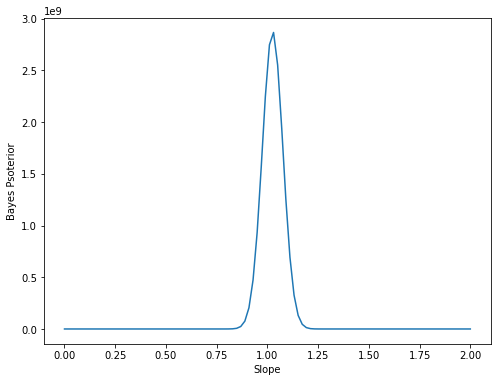

In [55]:
#CLD begin by making a slope grid to iterate over
slope_grid = np.linspace(0,2,100)

#CLD will have to iteratie over the slope grid in order to get right fits with theta
pdf = []
for slope in slope_grid:
    a = [-0.23, slope] #CLD first value is fixed y intercept
    ln_pdf = logL(a, data2) + uniform.logpdf(slope, 0.5, 1) #CLD adding prior because in log space for this calc
    pdf.append(np.exp(ln_pdf)) #CLD unlogging pdf

#CLD plotting the pdf
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(slope_grid, pdf)
ax.set_xlabel('Slope')
ax.set_ylabel('Bayes Psoterior')
plt.show(fig);

In [56]:
#CLD again the bayesian evidence is just the area under the graph, or the sum of the pdf
bayes_evid = np.sum(pdf)
print('The Bayesian evidence for this model is: '+str(bayes_evid))

The Bayesian evidence for this model is: 18101394291.452644


In [89]:
#CLD begin by making a slope grid to iterate over along with the quadratic coeff grid
slope_grid = np.linspace(0,2,100)
quad_grid = np.linspace(-2,4,100)

#CLD will have to iteratie over the slope grid in order to get right fits with theta
pdf2 = np.zeros((100,100))
for i in range(len(slope_grid)):
    for j in range(len(quad_grid)):
        a = [-0.23, slope_grid[i], quad_grid[j]] #CLD first value is fixed y intercept
        ln_pdf = logL(a, data2) + np.log(uniform.pdf(slope_grid[i], 0.5, 1) * uniform.pdf(quad_grid[j], -1, (0.25+1)))
        #CLD as the two variables are indpendent can mulitply them together 
        pdf2[i,j] = np.exp(ln_pdf) #CLD unlogging pdf

<ipython-input-89-d243f6ce8619>:10: RuntimeWarning: divide by zero encountered in log
  ln_pdf = logL(a, data2) + np.log(uniform.pdf(slope_grid[i], 0.5, 1) * uniform.pdf(quad_grid[j], -1, (0.25+1)))


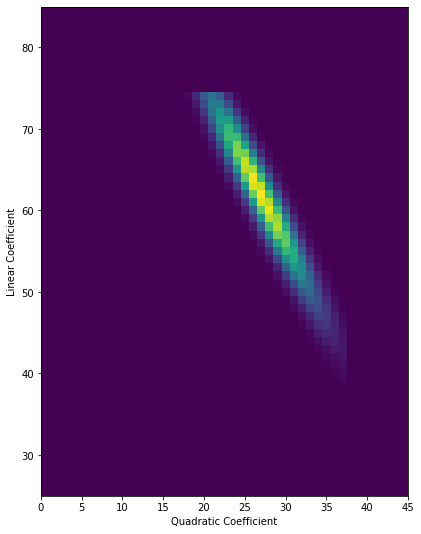

In [113]:
#CLD plotting the 2d pdf
#CLD in imshow the (M,N) values of the array define the rows and columns of the image respectively
#CLD so M is the linear coeff on y (the rows)
#CLD and N is the quad coeff on x (the columns)
plt.figure(figsize=(20,9))
plt.imshow(pdf2)
plt.ylim(25,85)
plt.xlim(0,45)
plt.xlabel('Quadratic Coefficient')
plt.ylabel('Linear Coefficient');

In [115]:
#CLD to calculate the Bayes factor for the 2d pdf, will be collapsing over columns, and the over rows
pdf_collap_column = np.sum(pdf2, axis=1)
bayes_evid_2d = np.sum(pdf_collap_column)
print('The Bayesian evidence for this model: '+str(bayes_evid_2d))

#CLD the Bayes factor of these models will be the ratio of the evidence 
bayes_factor2 = bayes_evid / bayes_evid_2d
print('The Bayes factor for linear model vs quadratic model: '+str(bayes_factor2))

The Bayesian evidence for this model: 403355193138.92676
The Bayes factor for linear model vs quadratic model: 0.04487705773808649


For this model, the quadratic version seems to be favored based on the Bayes factor. This is contrary to the BIC discussion seen in lecture 9, which favors the linear model. As this is different data, it is not surprising that this discrepancy arises between this model's Bayes factor and the BIC discussion presented in Lecture 9.